Fraudulent Transactions Detection based on year data of 2019 and 2020

Upon proper exploratory data analysis we decided to use the following
model implementation to the derived categorical features and got amazing
results

1.  Logistic Regression
2.  Decision Tree
3.  Naive Bias
4.  Random Forest Classifier

In \[1\]:

    #Importing modules
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(rc={'figure.figsize':(15,9)})

    #pip install plotly
    import plotly.express as px
    from sklearn.utils import resample
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB

    #Power BI environment
    # pip install powerbiclient
    # jupyter labextension install @jupyter-widgets/jupyterlab-manager
    from powerbiclient import Report, models
    from powerbiclient.authentication import DeviceCodeLoginAuthentication

In \[ \]:

     

In \[2\]:

    #Looking at the train dataset
    fraudtrain = pd.read_csv('fraudTrain.csv')
    fraudtrain.shape

Out\[2\]:

    (1296675, 23)

In \[3\]:

    #Looking at the test dataset
    fraudtest = pd.read_csv('fraudTest.csv')
    fraudtest.shape

Out\[3\]:

    (555719, 23)

In \[4\]:

    #Concating train and test dataset
    df = pd.concat([fraudtrain,fraudtest],ignore_index = True)

In \[5\]:

    #Shape of the entire merged data
    df.shape

Out\[5\]:

    (1852394, 23)

In \[6\]:

    #Describing the dataframe
    df.describe()

Out\[6\]:

|       | Unnamed: 0   | cc_num       | amt          | zip          | lat          | long          | city_pop     | unix_time    | merch_lat    | merch_long    | is_fraud     |
|-------|--------------|--------------|--------------|--------------|--------------|---------------|--------------|--------------|--------------|---------------|--------------|
| count | 1.852394e+06 | 1.852394e+06 | 1.852394e+06 | 1.852394e+06 | 1.852394e+06 | 1.852394e+06  | 1.852394e+06 | 1.852394e+06 | 1.852394e+06 | 1.852394e+06  | 1.852394e+06 |
| mean  | 5.371934e+05 | 4.173860e+17 | 7.006357e+01 | 4.881326e+04 | 3.853931e+01 | -9.022783e+01 | 8.864367e+04 | 1.358674e+09 | 3.853898e+01 | -9.022794e+01 | 5.210015e-03 |
| std   | 3.669110e+05 | 1.309115e+18 | 1.592540e+02 | 2.688185e+04 | 5.071470e+00 | 1.374789e+01  | 3.014876e+05 | 1.819508e+07 | 5.105604e+00 | 1.375969e+01  | 7.199217e-02 |
| min   | 0.000000e+00 | 6.041621e+10 | 1.000000e+00 | 1.257000e+03 | 2.002710e+01 | -1.656723e+02 | 2.300000e+01 | 1.325376e+09 | 1.902742e+01 | -1.666716e+02 | 0.000000e+00 |
| 25%   | 2.315490e+05 | 1.800429e+14 | 9.640000e+00 | 2.623700e+04 | 3.466890e+01 | -9.679800e+01 | 7.410000e+02 | 1.343017e+09 | 3.474012e+01 | -9.689944e+01 | 0.000000e+00 |
| 50%   | 4.630980e+05 | 3.521417e+15 | 4.745000e+01 | 4.817400e+04 | 3.935430e+01 | -8.747690e+01 | 2.443000e+03 | 1.357089e+09 | 3.936890e+01 | -8.744069e+01 | 0.000000e+00 |
| 75%   | 8.335758e+05 | 4.642255e+15 | 8.310000e+01 | 7.204200e+04 | 4.194040e+01 | -8.015800e+01 | 2.032800e+04 | 1.374581e+09 | 4.195626e+01 | -8.024511e+01 | 0.000000e+00 |
| max   | 1.296674e+06 | 4.992346e+18 | 2.894890e+04 | 9.992100e+04 | 6.669330e+01 | -6.795030e+01 | 2.906700e+06 | 1.388534e+09 | 6.751027e+01 | -6.695090e+01 | 1.000000e+00 |

In \[7\]:

    #Columns
    df.columns

Out\[7\]:

    Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
           'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
           'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
           'merch_lat', 'merch_long', 'is_fraud'],
          dtype='object')

In \[8\]:

    #Looking at first 10 rows to get the idea of data
    df.head(10)

Out\[8\]:

|     | Unnamed: 0 | trans_date_trans_time | cc_num           | merchant                           | category      | amt    | first     | last     | gender | street                         | ... | lat     | long      | city_pop | job                               | dob        | trans_num                        | unix_time  | merch_lat | merch_long  | is_fraud |
|-----|------------|-----------------------|------------------|------------------------------------|---------------|--------|-----------|----------|--------|--------------------------------|-----|---------|-----------|----------|-----------------------------------|------------|----------------------------------|------------|-----------|-------------|----------|
| 0   | 0          | 2019-01-01 00:00:18   | 2703186189652095 | fraud_Rippin, Kub and Mann         | misc_net      | 4.97   | Jennifer  | Banks    | F      | 561 Perry Cove                 | ... | 36.0788 | -81.1781  | 3495     | Psychologist, counselling         | 1988-03-09 | 0b242abb623afc578575680df30655b9 | 1325376018 | 36.011293 | -82.048315  | 0        |
| 1   | 1          | 2019-01-01 00:00:44   | 630423337322     | fraud_Heller, Gutmann and Zieme    | grocery_pos   | 107.23 | Stephanie | Gill     | F      | 43039 Riley Greens Suite 393   | ... | 48.8878 | -118.2105 | 149      | Special educational needs teacher | 1978-06-21 | 1f76529f8574734946361c461b024d99 | 1325376044 | 49.159047 | -118.186462 | 0        |
| 2   | 2          | 2019-01-01 00:00:51   | 38859492057661   | fraud_Lind-Buckridge               | entertainment | 220.11 | Edward    | Sanchez  | M      | 594 White Dale Suite 530       | ... | 42.1808 | -112.2620 | 4154     | Nature conservation officer       | 1962-01-19 | a1a22d70485983eac12b5b88dad1cf95 | 1325376051 | 43.150704 | -112.154481 | 0        |
| 3   | 3          | 2019-01-01 00:01:16   | 3534093764340240 | fraud_Kutch, Hermiston and Farrell | gas_transport | 45.00  | Jeremy    | White    | M      | 9443 Cynthia Court Apt. 038    | ... | 46.2306 | -112.1138 | 1939     | Patent attorney                   | 1967-01-12 | 6b849c168bdad6f867558c3793159a81 | 1325376076 | 47.034331 | -112.561071 | 0        |
| 4   | 4          | 2019-01-01 00:03:06   | 375534208663984  | fraud_Keeling-Crist                | misc_pos      | 41.96  | Tyler     | Garcia   | M      | 408 Bradley Rest               | ... | 38.4207 | -79.4629  | 99       | Dance movement psychotherapist    | 1986-03-28 | a41d7549acf90789359a9aa5346dcb46 | 1325376186 | 38.674999 | -78.632459  | 0        |
| 5   | 5          | 2019-01-01 00:04:08   | 4767265376804500 | fraud_Stroman, Hudson and Erdman   | gas_transport | 94.63  | Jennifer  | Conner   | F      | 4655 David Island              | ... | 40.3750 | -75.2045  | 2158     | Transport planner                 | 1961-06-19 | 189a841a0a8ba03058526bcfe566aab5 | 1325376248 | 40.653382 | -76.152667  | 0        |
| 6   | 6          | 2019-01-01 00:04:42   | 30074693890476   | fraud_Rowe-Vandervort              | grocery_net   | 44.54  | Kelsey    | Richards | F      | 889 Sarah Station Suite 624    | ... | 37.9931 | -100.9893 | 2691     | Arboriculturist                   | 1993-08-16 | 83ec1cc84142af6e2acf10c44949e720 | 1325376282 | 37.162705 | -100.153370 | 0        |
| 7   | 7          | 2019-01-01 00:05:08   | 6011360759745864 | fraud_Corwin-Collins               | gas_transport | 71.65  | Steven    | Williams | M      | 231 Flores Pass Suite 720      | ... | 38.8432 | -78.6003  | 6018     | Designer, multimedia              | 1947-08-21 | 6d294ed2cc447d2c71c7171a3d54967c | 1325376308 | 38.948089 | -78.540296  | 0        |
| 8   | 8          | 2019-01-01 00:05:18   | 4922710831011201 | fraud_Herzog Ltd                   | misc_pos      | 4.27   | Heather   | Chase    | F      | 6888 Hicks Stream Suite 954    | ... | 40.3359 | -79.6607  | 1472     | Public affairs consultant         | 1941-03-07 | fc28024ce480f8ef21a32d64c93a29f5 | 1325376318 | 40.351813 | -79.958146  | 0        |
| 9   | 9          | 2019-01-01 00:06:01   | 2720830304681674 | fraud_Schoen, Kuphal and Nitzsche  | grocery_pos   | 198.39 | Melissa   | Aguilar  | F      | 21326 Taylor Squares Suite 708 | ... | 36.5220 | -87.3490  | 151785   | Pathologist                       | 1974-03-28 | 3b9014ea8fb80bd65de0b1463b00b00e | 1325376361 | 37.179198 | -87.485381  | 0        |

10 rows × 23 columns

In \[9\]:

    #Calculating age from the transaction time and the date of birth columns
    df["age"] = pd.DatetimeIndex(df["trans_date_trans_time"]).year-pd.DatetimeIndex(df["dob"]).year

In \[10\]:

    #Plotting the heat map to find the correlation between the columns
    sns.heatmap(df.corr(),annot=True, linewidths=0.5, cmap = "Blues")

Out\[10\]:

    <AxesSubplot:>

![](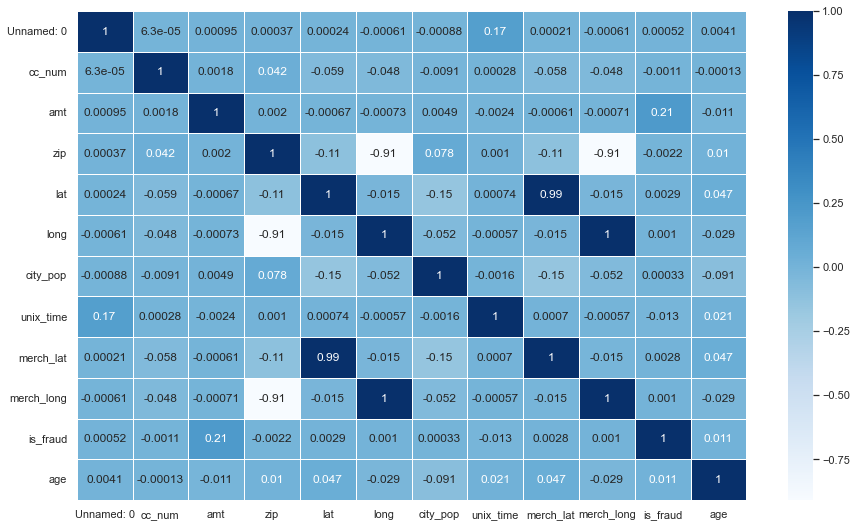%0A)

In \[11\]:

    #Getting attributes like year, month, hour, day of week, day from the transaction date time column and then dropping it
    df["year"] = pd.DatetimeIndex(df["trans_date_trans_time"]).year.astype(int).astype(str)
    df["hour"] = pd.DatetimeIndex(df["trans_date_trans_time"]).hour
    df["month"] = pd.DatetimeIndex(df["trans_date_trans_time"]).month
    df['dayofweek'] = pd.DatetimeIndex(df["trans_date_trans_time"]).dayofweek + 1
    df["day"] = pd.DatetimeIndex(df["trans_date_trans_time"]).day
    df = df.drop("trans_date_trans_time",1)

    /var/folders/1y/nm_zxyw17qnc8t9g8b_t5kbc0000gn/T/ipykernel_56488/315366874.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
      df = df.drop("trans_date_trans_time",1)

In \[12\]:

    #Looking at the new data again
    df.head()

Out\[12\]:

|     | Unnamed: 0 | cc_num           | merchant                           | category      | amt    | first     | last    | gender | street                       | city           | ... | unix_time  | merch_lat | merch_long  | is_fraud | age | year | hour | month | dayofweek | day |
|-----|------------|------------------|------------------------------------|---------------|--------|-----------|---------|--------|------------------------------|----------------|-----|------------|-----------|-------------|----------|-----|------|------|-------|-----------|-----|
| 0   | 0          | 2703186189652095 | fraud_Rippin, Kub and Mann         | misc_net      | 4.97   | Jennifer  | Banks   | F      | 561 Perry Cove               | Moravian Falls | ... | 1325376018 | 36.011293 | -82.048315  | 0        | 31  | 2019 | 0    | 1     | 2         | 1   |
| 1   | 1          | 630423337322     | fraud_Heller, Gutmann and Zieme    | grocery_pos   | 107.23 | Stephanie | Gill    | F      | 43039 Riley Greens Suite 393 | Orient         | ... | 1325376044 | 49.159047 | -118.186462 | 0        | 41  | 2019 | 0    | 1     | 2         | 1   |
| 2   | 2          | 38859492057661   | fraud_Lind-Buckridge               | entertainment | 220.11 | Edward    | Sanchez | M      | 594 White Dale Suite 530     | Malad City     | ... | 1325376051 | 43.150704 | -112.154481 | 0        | 57  | 2019 | 0    | 1     | 2         | 1   |
| 3   | 3          | 3534093764340240 | fraud_Kutch, Hermiston and Farrell | gas_transport | 45.00  | Jeremy    | White   | M      | 9443 Cynthia Court Apt. 038  | Boulder        | ... | 1325376076 | 47.034331 | -112.561071 | 0        | 52  | 2019 | 0    | 1     | 2         | 1   |
| 4   | 4          | 375534208663984  | fraud_Keeling-Crist                | misc_pos      | 41.96  | Tyler     | Garcia  | M      | 408 Bradley Rest             | Doe Hill       | ... | 1325376186 | 38.674999 | -78.632459  | 0        | 33  | 2019 | 0    | 1     | 2         | 1   |

5 rows × 28 columns

In \[13\]:

    #Plotting fraud transactions for both years 2019 and 2021
    sns.countplot(x="year",data=df[df["is_fraud"]==1])

Out\[13\]:

    <AxesSubplot:xlabel='year', ylabel='count'>

![](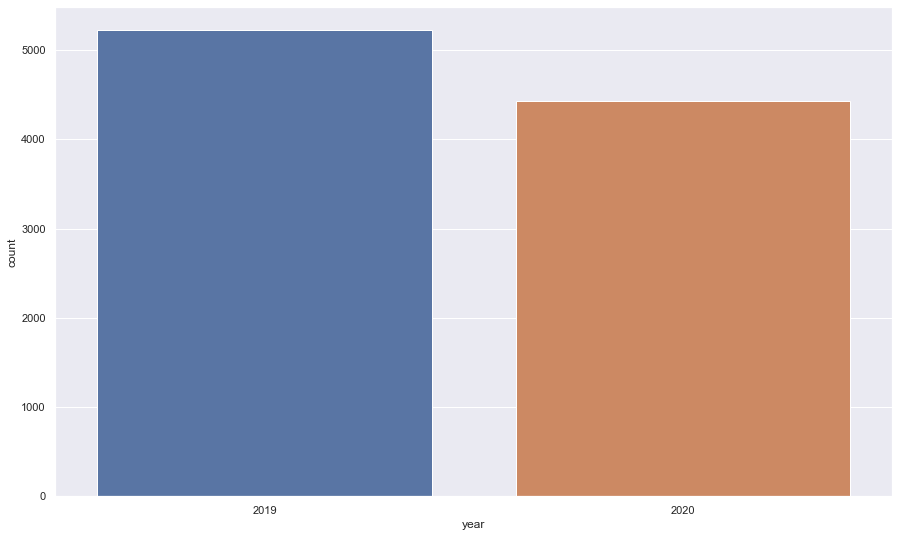%0A)

In \[14\]:

    #Checking for percentage of fraud transactions from the is_fraud columns
    count_0, count_1 = 0,0
    for i in df["is_fraud"]:
        if i == 0:
            count_0+=1
        else:
            count_1+=1
    print(count_1*100/count_0)

    0.5237301132062365

In \[15\]:

    df.columns

Out\[15\]:

    Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
           'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
           'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
           'is_fraud', 'age', 'year', 'hour', 'month', 'dayofweek', 'day'],
          dtype='object')

In \[16\]:

    #Defining a bucket to categorize age into different age groups
    def age_group(row):
        rows = row["age"]
        if rows <20:
            return "less than 20"
        elif rows >=20 and rows<30:
            return "20 to 30"
        elif rows >=30 and rows<40:
            return "30 to 40"
        elif rows >=40 and rows<50:
            return "40 to 50"
        elif rows >=50 and rows<60:
            return "50 to 60"
        elif rows >=60 and rows<70:
            return "60 to 70"
        elif rows >=70 and rows<80:
            return "70 to 80"
        elif rows >=80 and rows<90:
            return "80 to 90"
        else:
            return "greater than 90"
    df["age_group"] = df.apply(age_group,axis=1)

In \[17\]:

    #Dropping age and date of birth from the dataframe
    df1 = df.drop(['age','dob'],1)

    /var/folders/1y/nm_zxyw17qnc8t9g8b_t5kbc0000gn/T/ipykernel_56488/1304700491.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
      df1 = df.drop(['age','dob'],1)

In \[18\]:

    df1.head()

Out\[18\]:

|     | Unnamed: 0 | cc_num           | merchant                           | category      | amt    | first     | last    | gender | street                       | city           | ... | unix_time  | merch_lat | merch_long  | is_fraud | year | hour | month | dayofweek | day | age_group |
|-----|------------|------------------|------------------------------------|---------------|--------|-----------|---------|--------|------------------------------|----------------|-----|------------|-----------|-------------|----------|------|------|-------|-----------|-----|-----------|
| 0   | 0          | 2703186189652095 | fraud_Rippin, Kub and Mann         | misc_net      | 4.97   | Jennifer  | Banks   | F      | 561 Perry Cove               | Moravian Falls | ... | 1325376018 | 36.011293 | -82.048315  | 0        | 2019 | 0    | 1     | 2         | 1   | 30 to 40  |
| 1   | 1          | 630423337322     | fraud_Heller, Gutmann and Zieme    | grocery_pos   | 107.23 | Stephanie | Gill    | F      | 43039 Riley Greens Suite 393 | Orient         | ... | 1325376044 | 49.159047 | -118.186462 | 0        | 2019 | 0    | 1     | 2         | 1   | 40 to 50  |
| 2   | 2          | 38859492057661   | fraud_Lind-Buckridge               | entertainment | 220.11 | Edward    | Sanchez | M      | 594 White Dale Suite 530     | Malad City     | ... | 1325376051 | 43.150704 | -112.154481 | 0        | 2019 | 0    | 1     | 2         | 1   | 50 to 60  |
| 3   | 3          | 3534093764340240 | fraud_Kutch, Hermiston and Farrell | gas_transport | 45.00  | Jeremy    | White   | M      | 9443 Cynthia Court Apt. 038  | Boulder        | ... | 1325376076 | 47.034331 | -112.561071 | 0        | 2019 | 0    | 1     | 2         | 1   | 50 to 60  |
| 4   | 4          | 375534208663984  | fraud_Keeling-Crist                | misc_pos      | 41.96  | Tyler     | Garcia  | M      | 408 Bradley Rest             | Doe Hill       | ... | 1325376186 | 38.674999 | -78.632459  | 0        | 2019 | 0    | 1     | 2         | 1   | 30 to 40  |

5 rows × 27 columns

In \[19\]:

    #Plotting fraud transactions for different age groups
    order = ["less than 20","20 to 30","30 to 40","40 to 50","50 to 60","60 to 70","70 to 80","80 to 90","greater than 90"]
    sns.countplot(x="age_group",data=df1[df1["is_fraud"]==1], order = order)

Out\[19\]:

    <AxesSubplot:xlabel='age_group', ylabel='count'>

![](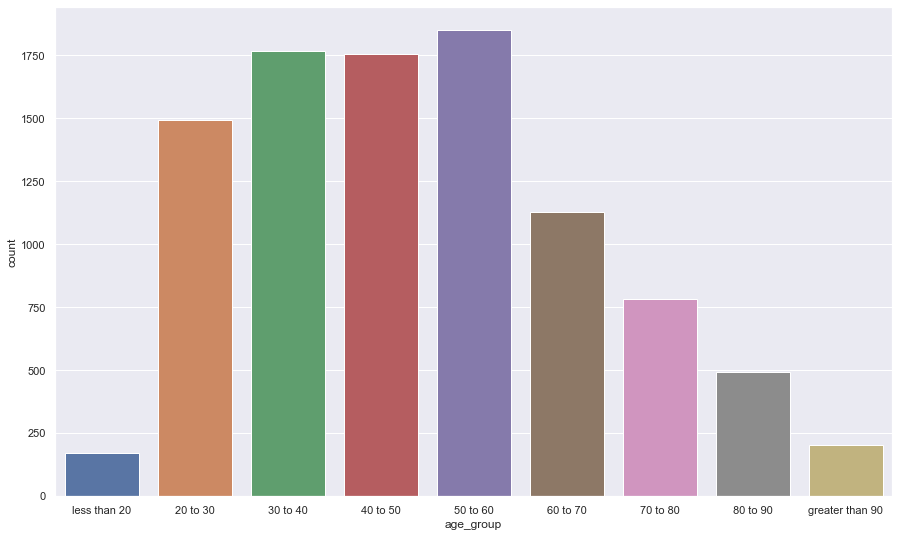%0A)

In \[20\]:

    #Plotting fraud transactions with respect to gender
    sns.countplot(x="gender",data=df1[df1["is_fraud"]==1])

Out\[20\]:

    <AxesSubplot:xlabel='gender', ylabel='count'>

![](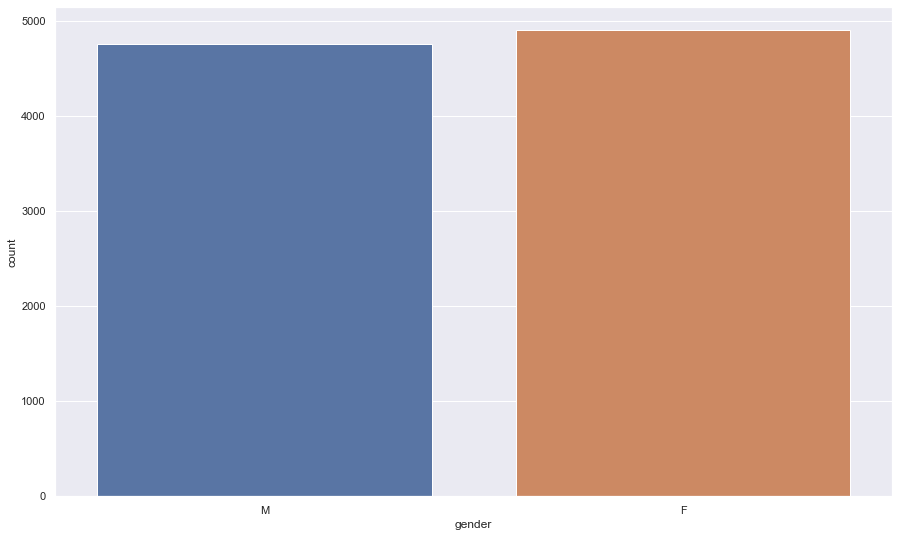%0A)

In \[21\]:

    #Plotting fraud transactions with respect to states
    sns.countplot(x="state",data=df1[df1["is_fraud"]==1])

Out\[21\]:

    <AxesSubplot:xlabel='state', ylabel='count'>

![](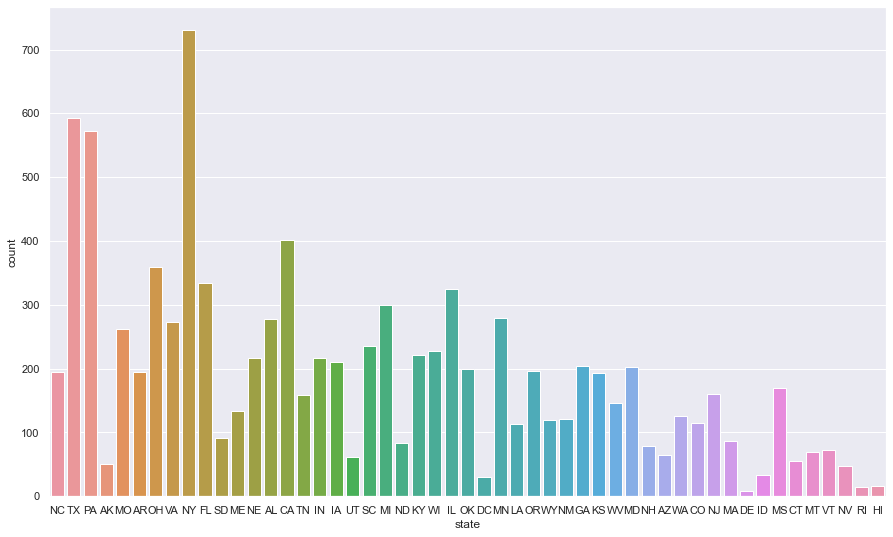%0A)

In \[22\]:

    #Plotting fraud transactions with respect to the hour of day
    sns.countplot(x="hour",data=df1[df1["is_fraud"]==1])
    #It can be concluded that most of the fraud transactions happened during midnight

Out\[22\]:

    <AxesSubplot:xlabel='hour', ylabel='count'>

![](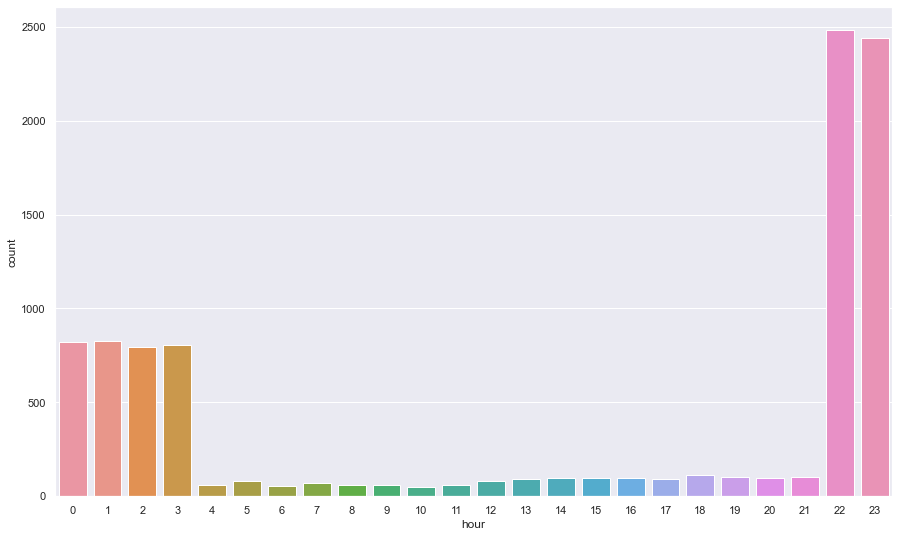%0A)

In \[23\]:

    #Creating a dataframe consisting of state wise fraud transactions
    df2 = df1.groupby(by="state").sum()["is_fraud"].to_frame()
    df2.reset_index(inplace=True)
    df2 = df2.rename(columns = {"state":"State","is_fraud":"Fraudulent Transactions"})
    df2.head()

Out\[23\]:

|     | State | Fraudulent Transactions |
|-----|-------|-------------------------|
| 0   | AK    | 50.0                    |
| 1   | AL    | 278.0                   |
| 2   | AR    | 195.0                   |
| 3   | AZ    | 64.0                    |
| 4   | CA    | 402.0                   |

In \[24\]:

    #This plot shows a geographical map of United States with different color schemes showing the intensity of fraud transactions that happened
    fig = px.choropleth(df2,
                        locations='State',
                        color='Fraudulent Transactions',
                        locationmode='USA-states',
                        color_continuous_scale="picnic",
                        labels={'States':'Fraudulent transactions'},
                        scope='usa')
    fig.add_scattergeo(
        locations=df2['State'],
        locationmode='USA-states',
        text=df2['State'],
        mode='text'
    )
    fig.show()

In \[25\]:

    df1.head()

Out\[25\]:

|     | Unnamed: 0 | cc_num           | merchant                           | category      | amt    | first     | last    | gender | street                       | city           | ... | unix_time  | merch_lat | merch_long  | is_fraud | year | hour | month | dayofweek | day | age_group |
|-----|------------|------------------|------------------------------------|---------------|--------|-----------|---------|--------|------------------------------|----------------|-----|------------|-----------|-------------|----------|------|------|-------|-----------|-----|-----------|
| 0   | 0          | 2703186189652095 | fraud_Rippin, Kub and Mann         | misc_net      | 4.97   | Jennifer  | Banks   | F      | 561 Perry Cove               | Moravian Falls | ... | 1325376018 | 36.011293 | -82.048315  | 0        | 2019 | 0    | 1     | 2         | 1   | 30 to 40  |
| 1   | 1          | 630423337322     | fraud_Heller, Gutmann and Zieme    | grocery_pos   | 107.23 | Stephanie | Gill    | F      | 43039 Riley Greens Suite 393 | Orient         | ... | 1325376044 | 49.159047 | -118.186462 | 0        | 2019 | 0    | 1     | 2         | 1   | 40 to 50  |
| 2   | 2          | 38859492057661   | fraud_Lind-Buckridge               | entertainment | 220.11 | Edward    | Sanchez | M      | 594 White Dale Suite 530     | Malad City     | ... | 1325376051 | 43.150704 | -112.154481 | 0        | 2019 | 0    | 1     | 2         | 1   | 50 to 60  |
| 3   | 3          | 3534093764340240 | fraud_Kutch, Hermiston and Farrell | gas_transport | 45.00  | Jeremy    | White   | M      | 9443 Cynthia Court Apt. 038  | Boulder        | ... | 1325376076 | 47.034331 | -112.561071 | 0        | 2019 | 0    | 1     | 2         | 1   | 50 to 60  |
| 4   | 4          | 375534208663984  | fraud_Keeling-Crist                | misc_pos      | 41.96  | Tyler     | Garcia  | M      | 408 Bradley Rest             | Doe Hill       | ... | 1325376186 | 38.674999 | -78.632459  | 0        | 2019 | 0    | 1     | 2         | 1   | 30 to 40  |

5 rows × 27 columns

In \[26\]:

    #Calculating the distance between the merchant location and transaction location from the latitude and longitude values of each
    df1["latitude_difference"] = abs(df1["lat"]-df1["merch_lat"])
    df1["longitude_difference"] = abs(df1["long"]-df1["merch_long"])
    df1["dist"] = np.sqrt(pow(df1["latitude_difference"]*110,2)+pow(df1["longitude_difference"]*110,2))

In \[27\]:

    #Generating CSV files for Power BI implementation
    df1.to_csv("main.csv",index=False)
    df2.to_csv("states.csv",index=False)

In \[28\]:

    #Power BI Reports
    # device_auth = DeviceCodeLoginAuthentication()
    # access_token = device_auth.get_access_token()
    # group_id="18eee0e3-7db3-4889-a2a1-ec934169231c"
    # report_id="6b10b20e-df30-4437-a1f0-5c3bbfe3fa4b"
    # report = Report(group_id=group_id, report_id=report_id, access_token=access_token, token_type=models.TokenType.AAD.value)
    # report

In \[29\]:

    #Dropping the columns
    df1 = df1.drop(["lat","long","merch_lat","merch_long","latitude_difference","longitude_difference"],1)

    /var/folders/1y/nm_zxyw17qnc8t9g8b_t5kbc0000gn/T/ipykernel_56488/1994570755.py:2: FutureWarning:

    In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

In \[30\]:

    df1.head()

Out\[30\]:

|     | Unnamed: 0 | cc_num           | merchant                           | category      | amt    | first     | last    | gender | street                       | city           | ... | trans_num                        | unix_time  | is_fraud | year | hour | month | dayofweek | day | age_group | dist       |
|-----|------------|------------------|------------------------------------|---------------|--------|-----------|---------|--------|------------------------------|----------------|-----|----------------------------------|------------|----------|------|------|-------|-----------|-----|-----------|------------|
| 0   | 0          | 2703186189652095 | fraud_Rippin, Kub and Mann         | misc_net      | 4.97   | Jennifer  | Banks   | F      | 561 Perry Cove               | Moravian Falls | ... | 0b242abb623afc578575680df30655b9 | 1325376018 | 0        | 2019 | 0    | 1     | 2         | 1   | 30 to 40  | 96.011245  |
| 1   | 1          | 630423337322     | fraud_Heller, Gutmann and Zieme    | grocery_pos   | 107.23 | Stephanie | Gill    | F      | 43039 Riley Greens Suite 393 | Orient         | ... | 1f76529f8574734946361c461b024d99 | 1325376044 | 0        | 2019 | 0    | 1     | 2         | 1   | 40 to 50  | 29.954105  |
| 2   | 2          | 38859492057661   | fraud_Lind-Buckridge               | entertainment | 220.11 | Edward    | Sanchez | M      | 594 White Dale Suite 530     | Malad City     | ... | a1a22d70485983eac12b5b88dad1cf95 | 1325376051 | 0        | 2019 | 0    | 1     | 2         | 1   | 50 to 60  | 107.342986 |
| 3   | 3          | 3534093764340240 | fraud_Kutch, Hermiston and Farrell | gas_transport | 45.00  | Jeremy    | White   | M      | 9443 Cynthia Court Apt. 038  | Boulder        | ... | 6b849c168bdad6f867558c3793159a81 | 1325376076 | 0        | 2019 | 0    | 1     | 2         | 1   | 50 to 60  | 101.178169 |
| 4   | 4          | 375534208663984  | fraud_Keeling-Crist                | misc_pos      | 41.96  | Tyler     | Garcia  | M      | 408 Bradley Rest             | Doe Hill       | ... | a41d7549acf90789359a9aa5346dcb46 | 1325376186 | 0        | 2019 | 0    | 1     | 2         | 1   | 30 to 40  | 95.535506  |

5 rows × 24 columns

In \[31\]:

    #Looking for unique values in data
    df1.nunique()

Out\[31\]:

    Unnamed: 0    1296675
    cc_num            999
    merchant          693
    category           14
    amt             60616
    first             355
    last              486
    gender              2
    street            999
    city              906
    state              51
    zip               985
    city_pop          891
    job               497
    trans_num     1852394
    unix_time     1819583
    is_fraud            2
    year                2
    hour               24
    month              12
    dayofweek           7
    day                31
    age_group           9
    dist          1852392
    dtype: int64

In \[32\]:

    #Dropping columns which dont contribute to the result
    drop_cols = ["cc_num","merchant","first","last","street","trans_num","Unnamed: 0","city_pop","job","unix_time","trans_num","city","zip"]
    df1 = df1.drop(columns = drop_cols,axis=1)

In \[33\]:

    df1.head()

Out\[33\]:

|     | category      | amt    | gender | state | is_fraud | year | hour | month | dayofweek | day | age_group | dist       |
|-----|---------------|--------|--------|-------|----------|------|------|-------|-----------|-----|-----------|------------|
| 0   | misc_net      | 4.97   | F      | NC    | 0        | 2019 | 0    | 1     | 2         | 1   | 30 to 40  | 96.011245  |
| 1   | grocery_pos   | 107.23 | F      | WA    | 0        | 2019 | 0    | 1     | 2         | 1   | 40 to 50  | 29.954105  |
| 2   | entertainment | 220.11 | M      | ID    | 0        | 2019 | 0    | 1     | 2         | 1   | 50 to 60  | 107.342986 |
| 3   | gas_transport | 45.00  | M      | MT    | 0        | 2019 | 0    | 1     | 2         | 1   | 50 to 60  | 101.178169 |
| 4   | misc_pos      | 41.96  | M      | VA    | 0        | 2019 | 0    | 1     | 2         | 1   | 30 to 40  | 95.535506  |

In \[34\]:

    #One hot encoding of data
    df1_with_dummies = pd.concat([df1,pd.get_dummies(df1["gender"]),pd.get_dummies(df1["year"]),pd.get_dummies(df1["age_group"]),pd.get_dummies(df1["state"]),pd.get_dummies("category")],axis=1)
    df1_with_dummies = df1_with_dummies.drop(["gender","age_group","state","year","category"],1)

    /var/folders/1y/nm_zxyw17qnc8t9g8b_t5kbc0000gn/T/ipykernel_56488/822276459.py:3: FutureWarning:

    In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

In \[35\]:

    #Looking at the encoded data
    df1_with_dummies.head()

Out\[35\]:

|     | amt    | is_fraud | hour | month | dayofweek | day | dist       | F   | M   | 2019 | ... | SD  | TN  | TX  | UT  | VA  | VT  | WA  | WI  | WV  | WY  |
|-----|--------|----------|------|-------|-----------|-----|------------|-----|-----|------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 0   | 4.97   | 0        | 0    | 1     | 2         | 1   | 96.011245  | 1   | 0   | 1    | ... | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
| 1   | 107.23 | 0        | 0    | 1     | 2         | 1   | 29.954105  | 1   | 0   | 1    | ... | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 0   |
| 2   | 220.11 | 0        | 0    | 1     | 2         | 1   | 107.342986 | 0   | 1   | 1    | ... | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
| 3   | 45.00  | 0        | 0    | 1     | 2         | 1   | 101.178169 | 0   | 1   | 1    | ... | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
| 4   | 41.96  | 0        | 0    | 1     | 2         | 1   | 95.535506  | 0   | 1   | 1    | ... | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 0   |

5 rows × 71 columns

In \[36\]:

    #Resampling the dataframe
    not_fraud = df1_with_dummies[df1_with_dummies.is_fraud == 0]
    fraud = df1_with_dummies[df1_with_dummies.is_fraud == 1]

    oversample=resample(fraud, replace=True, n_samples=len(not_fraud), random_state=15)
    balanced_df=pd.concat([not_fraud, oversample])

In \[37\]:

    #Again checking the count of fraud transactions
    count_0, count_1 = 0,0
    for i in balanced_df["is_fraud"]:
        if i == 0:
            count_0+=1
        else:
            count_1+=1
    print(count_1,count_0)

    1842743 1842743

In \[38\]:

    #Using test train split to split data into coordinates
    X_train,X_test,y_train,y_test = train_test_split(balanced_df.drop(["is_fraud"],axis=1),balanced_df["is_fraud"],test_size=0.2,random_state=42)

In \[39\]:

    X_train.shape,X_test.shape,y_train.shape,y_test.shape

Out\[39\]:

    ((2948388, 70), (737098, 70), (2948388,), (737098,))

In \[40\]:

    #Defining a generic function to implement models and returning data values
    def model_implementation(model,X_train,X_test,y_train,y_test):
        if model == "LogisticRegression":
            model = "Logistic Regression"
            model_impl = LogisticRegression()
        elif model == "DecisionTree":
            model = "Decision Tree"
            model_impl = DecisionTreeClassifier(random_state=0, max_depth=2)
        elif model == "RandomForestClassifier":
            model = "Random Forest Classifier"
            model_impl = RandomForestClassifier(random_state=0,max_depth= 10, max_features= 5,min_samples_leaf= 30, min_samples_split= 100, n_estimators= 500)
        elif model == "GaussianNaiveBias":
            model = "Gaussian Naive Bias"
            model_impl = GaussianNB()
        model_impl.fit(X_train,y_train)
        pred_train=model_impl.predict(X_train)
        pred_test=model_impl.predict(X_test)

        accuracy_train = accuracy_score(pred_train,y_train)
        accuracy_test = accuracy_score(pred_test,y_test)
        confusionMatrix = confusion_matrix(y_test,pred_test)
        classificationReport = classification_report(y_test,pred_test)
        mae = mean_absolute_error(y_train,pred_train)
        print("Model Implemented: ", model)
        print("Accuracy on Training Set: ", accuracy_train)
        print('Accuracy on Validation Set: ', accuracy_test)
        print('Mean absolute error: ',mae)
        print('Confusion Matrix\n', confusionMatrix)
        print('Classification Report\n', classificationReport)

        return [accuracy_train,accuracy_test]

In \[41\]:

    #Gaussian Naive Bias
    model1= model_implementation("GaussianNaiveBias",X_train,X_test,y_train,y_test)

    Model Implemented:  Gaussian Naive Bias
    Accuracy on Training Set:  0.7351281445996931
    Accuracy on Validation Set:  0.7351424098288152
    Mean absolute error:  0.2648718554003069
    Confusion Matrix
     [[318476  49640]
     [145586 223396]]
    Classification Report
                   precision    recall  f1-score   support

               0       0.69      0.87      0.77    368116
               1       0.82      0.61      0.70    368982

        accuracy                           0.74    737098
       macro avg       0.75      0.74      0.73    737098
    weighted avg       0.75      0.74      0.73    737098

In \[42\]:

    #Logistic Regression
    model2 = model_implementation("LogisticRegression",X_train,X_test,y_train,y_test)

    /Users/saurabhambardekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

    lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in:
        https://scikit-learn.org/stable/modules/preprocessing.html
    Please also refer to the documentation for alternative solver options:
        https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

    Model Implemented:  Logistic Regression
    Accuracy on Training Set:  0.8492745866554877
    Accuracy on Validation Set:  0.8492900536970661
    Mean absolute error:  0.1507254133445123
    Confusion Matrix
     [[348811  19305]
     [ 91783 277199]]
    Classification Report
                   precision    recall  f1-score   support

               0       0.79      0.95      0.86    368116
               1       0.93      0.75      0.83    368982

        accuracy                           0.85    737098
       macro avg       0.86      0.85      0.85    737098
    weighted avg       0.86      0.85      0.85    737098

In \[43\]:

    #Decision Tree Classifier
    model3 = model_implementation("DecisionTree",X_train,X_test,y_train,y_test)

    Model Implemented:  Decision Tree
    Accuracy on Training Set:  0.8703216808642553
    Accuracy on Validation Set:  0.8703252484744227
    Mean absolute error:  0.12967831913574468
    Confusion Matrix
     [[322201  45915]
     [ 49668 319314]]
    Classification Report
                   precision    recall  f1-score   support

               0       0.87      0.88      0.87    368116
               1       0.87      0.87      0.87    368982

        accuracy                           0.87    737098
       macro avg       0.87      0.87      0.87    737098
    weighted avg       0.87      0.87      0.87    737098

In \[44\]:

    #Random Forest Classifier
    model4 = model_implementation("RandomForestClassifier",X_train,X_test,y_train,y_test)

    Model Implemented:  Random Forest Classifier
    Accuracy on Training Set:  0.9051864951288636
    Accuracy on Validation Set:  0.9049827838360707
    Mean absolute error:  0.09481350487113636
    Confusion Matrix
     [[351881  16235]
     [ 53802 315180]]
    Classification Report
                   precision    recall  f1-score   support

               0       0.87      0.96      0.91    368116
               1       0.95      0.85      0.90    368982

        accuracy                           0.90    737098
       macro avg       0.91      0.91      0.90    737098
    weighted avg       0.91      0.90      0.90    737098

In \[45\]:

    train_val = [model1[0],model2[0],model3[0],model4[0]]
    index = ["Gaussian Naive Bias","Logistic Regression","Decision Tree Classifier","Random Forest Classifier"]
    training_acc = pd.Series(data=train_val,index=index)
    training_acc.plot.line(x="Model Implementation",y="Accuracy in percentages")

Out\[45\]:

    <AxesSubplot:>

![](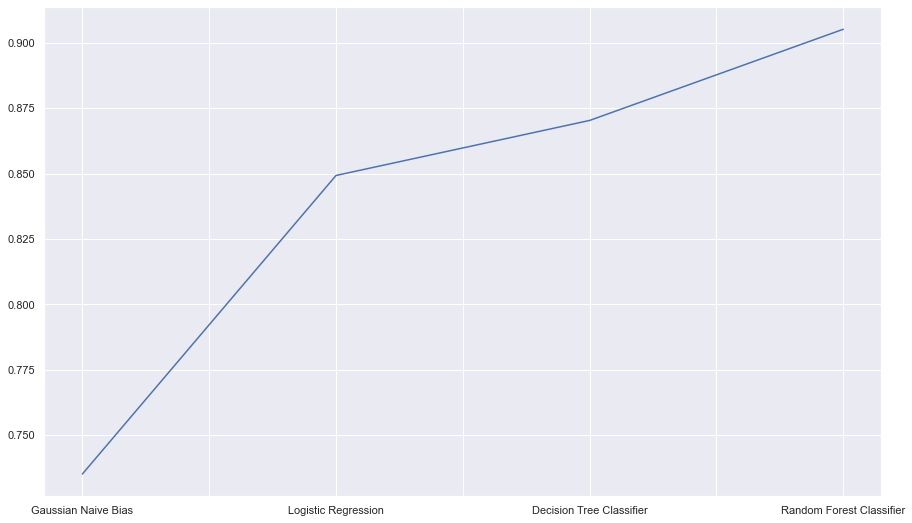%0A)

In \[46\]:

    test_val = [model1[0],model2[0],model3[0],model4[0]]
    index = ["Gaussian Naive Bias","Logistic Regression","Decision Tree Classifier","Random Forest Classifier"]
    testing_acc = pd.Series(data=test_val,index=index)
    testing_acc.plot.line(x="Model Implementation",y="Accuracy in percentages")

Out\[46\]:

    <AxesSubplot:>

![](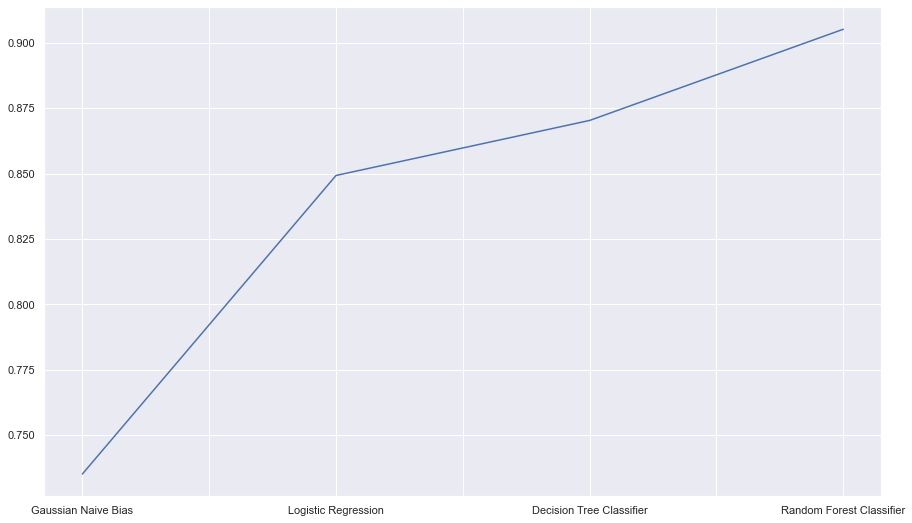%0A)

In \[ \]: